- Link 1: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- Link 2: https://www.kaggle.com/fabiendaniel/customer-segmentation/notebook
- Link 3: https://dl.acm.org/doi/abs/10.1145/2379776.2379786
- Link 4: https://machinelearningmastery.com/probabilistic-model-selection-measures/
- Link 5: https://hrngok.github.io/posts/metrics/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nhandv6_classification as dvn_c
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

peng = sns.load_dataset("penguins")
peng.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

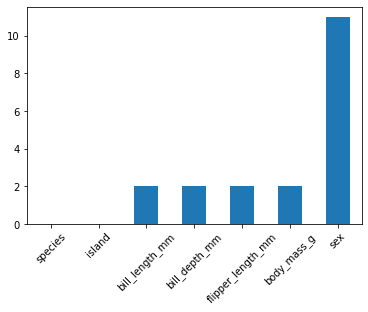

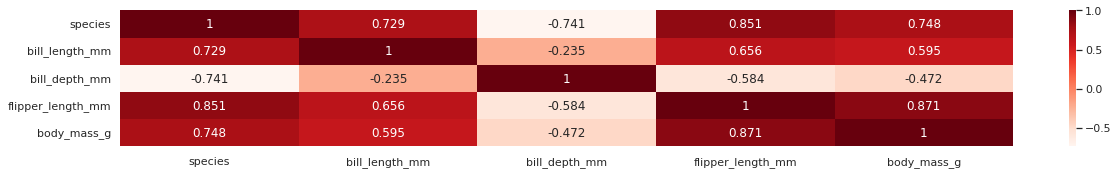

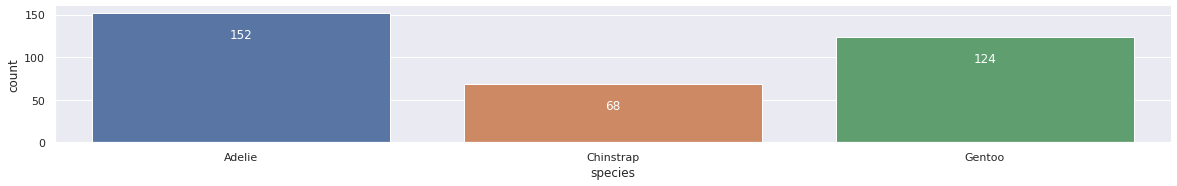

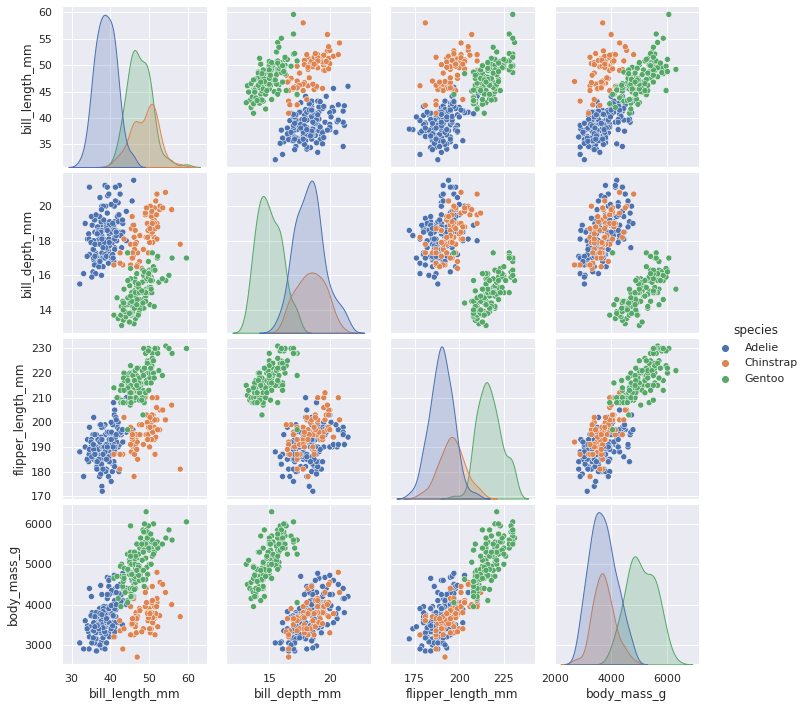

In [2]:
peng.isnull().sum().plot(kind='bar', rot = 45);
ndf = dvn_c.classification_preprocessing(peng.drop(columns = ['sex', 'island']),
                                                   target_col = 'species')

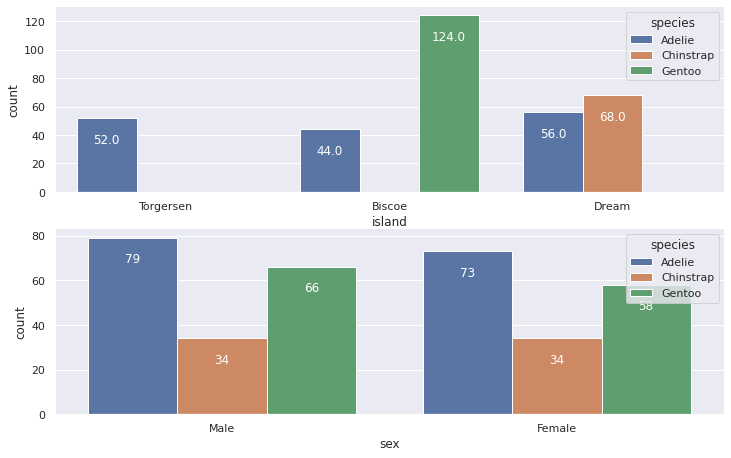

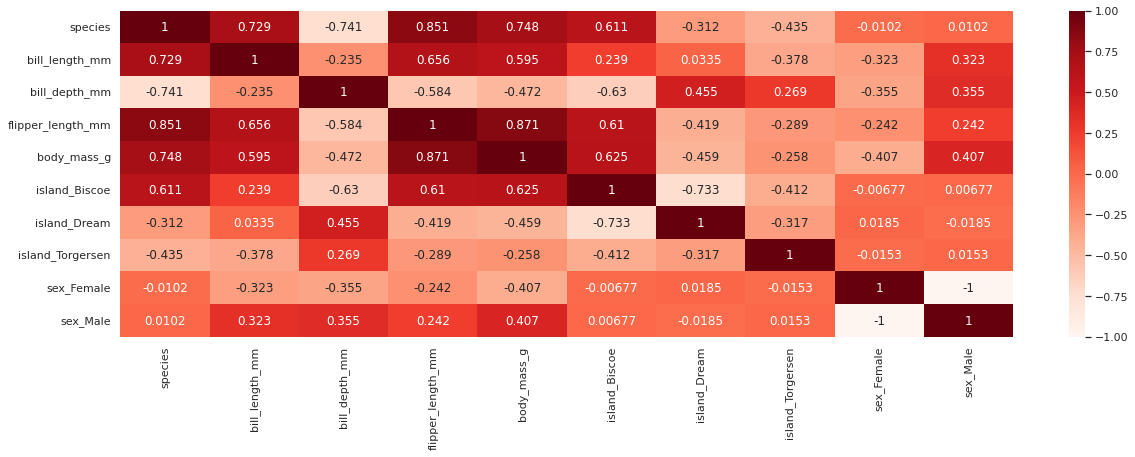

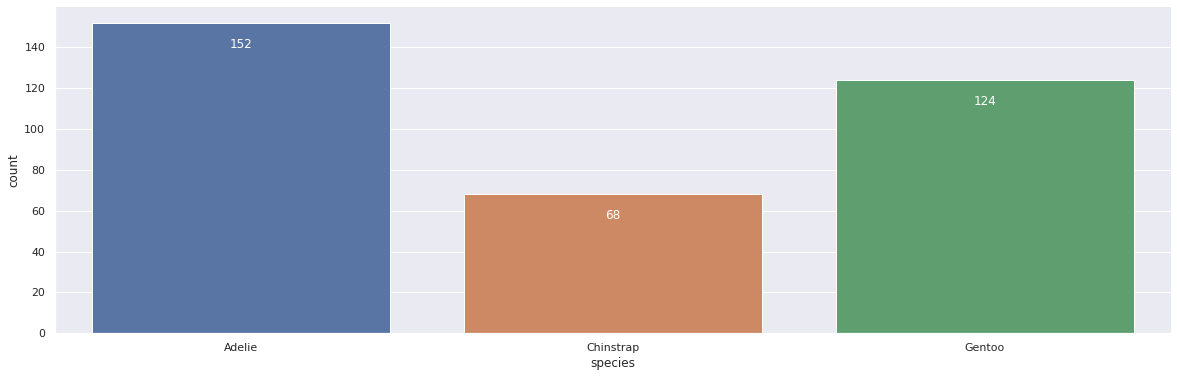

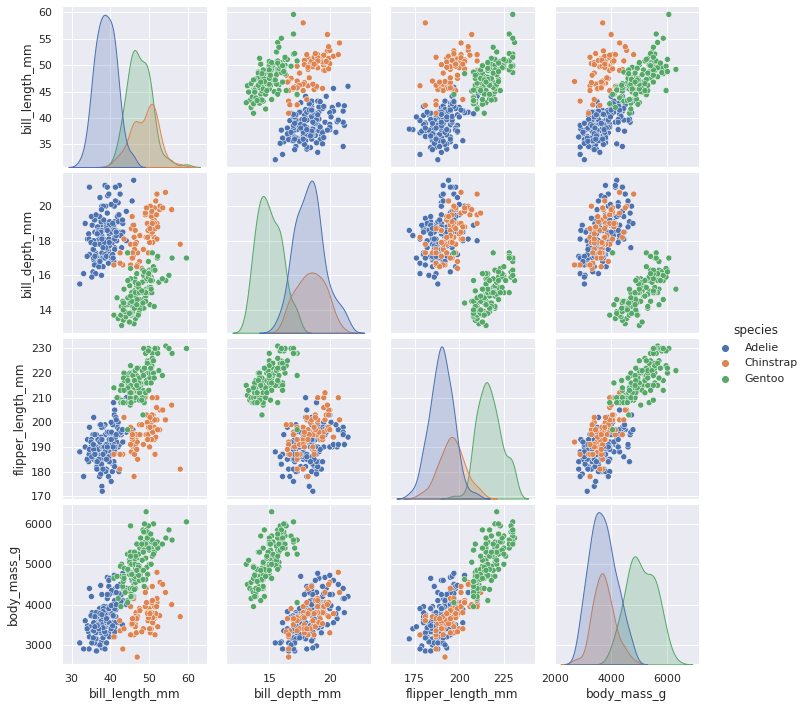

In [3]:
target_col = 'species'
prep_data = dvn_c.classification_preprocessing(peng, target_col)

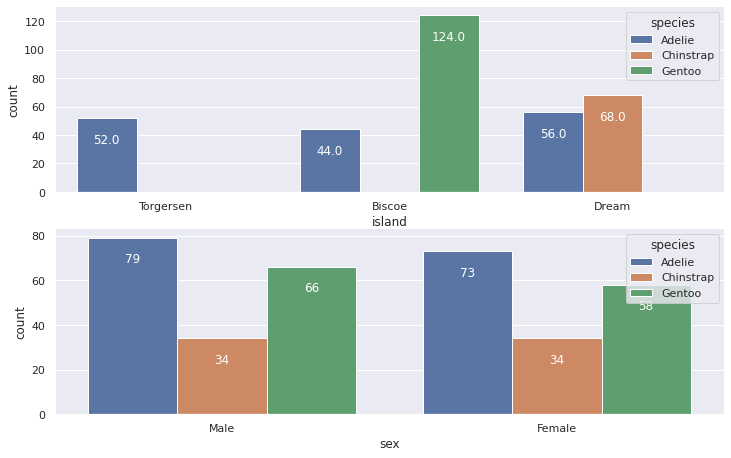

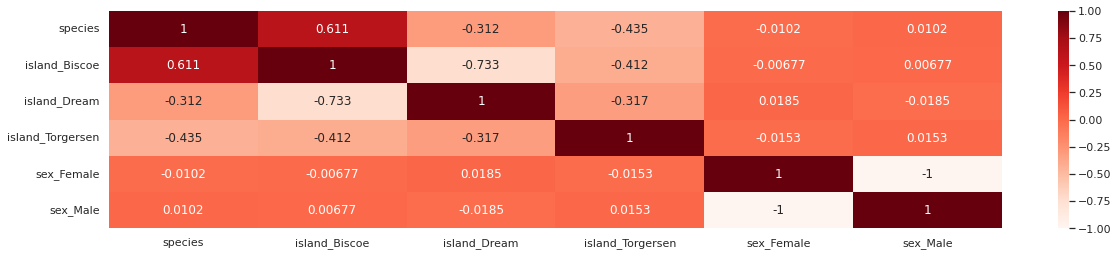

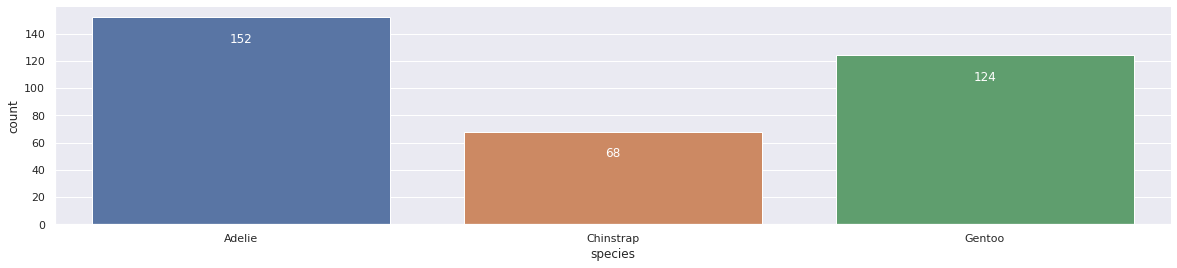

In [4]:
ndf = dvn_c.classification_preprocessing(peng[['sex', 'island', 'species']],
                                                   target_col = 'species')

In [5]:
prep_data.shape

(344, 10)

In [6]:
peng = prep_data

X = peng.drop(columns = 'species')
y = peng['species']
cv_kfolds = StratifiedKFold(n_splits=5, shuffle=True)
clf = RandomForestClassifier()
grid_params = {'n_estimators': [100, 200, 250],
               'max_depth': [6, 8, 10],
               'min_samples_split': [1, 3]
             }

In [7]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, log_loss
import warnings
warnings.filterwarnings("ignore")

n_folds = 4
x_name, y_name = 'bill_length_mm', 'flipper_length_mm'
clf_column =  'species'
clf = RandomForestClassifier()

Best parameters = {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100} 
Trained_time = 0.0 minutes, 13.52 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        38
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        38
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.99        86
   macro avg

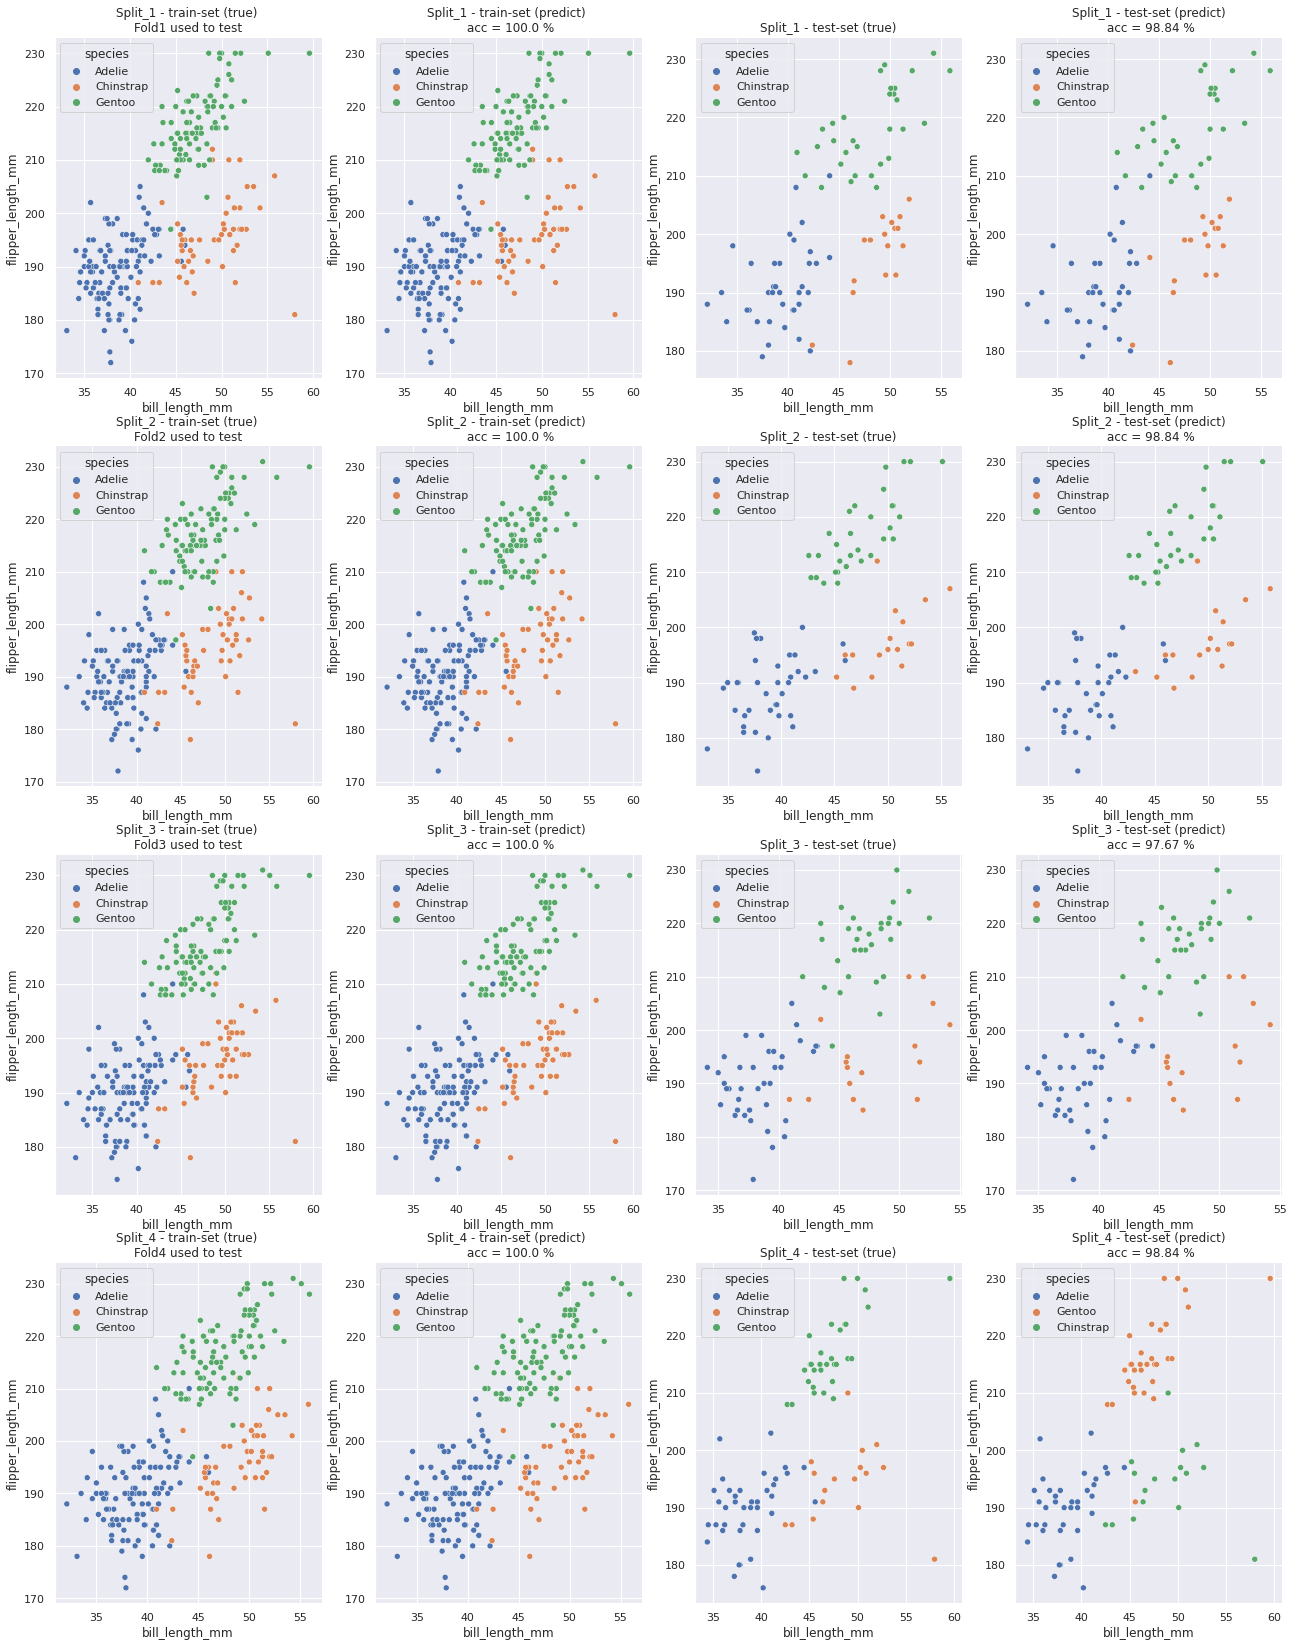

In [8]:
df = dvn_c.k_Fold_Best_params_show_all_(peng, n_folds, clf, grid_params, 
                                   clf_column, x_name, y_name,
                                   is_shuffle = True,
                                   show_all = True)

In [9]:
df

ROC_AUC  accuracy  \
Split_1            1.000000  0.988372   
Split_2            1.000000  0.988372   
Split_3            0.999347  0.976744   
Split_4            1.000000  0.988372   
avg_score_k_split  0.999837  0.985465   

                                                            f1_score  \
Split_1            {'Adelie': 0.99, 'Chinstrap': 0.97, 'Gentoo': ...   
Split_2            {'Adelie': 0.99, 'Chinstrap': 0.97, 'Gentoo': ...   
Split_3            {'Adelie': 0.97, 'Chinstrap': 0.97, 'Gentoo': ...   
Split_4            {'Adelie': 0.99, 'Chinstrap': 1.0, 'Gentoo': 0...   
avg_score_k_split  {'Adelie': 0.985, 'Chinstrap': 0.9775, 'Gentoo...   

                                                            precison  \
Split_1            {'Adelie': 1.0, 'Chinstrap': 0.94, 'Gentoo': 1.0}   
Split_2            {'Adelie': 1.0, 'Chinstrap': 0.94, 'Gentoo': 1.0}   
Split_3            {'Adelie': 0.95, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_4            {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 0.97}   
avg_score_k_split  {'Adelie': 0.9875, 'Chinstrap': 0.97, 'Gentoo'...   

                                                              recall  \
Split_1            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_2            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 1.0, 'Chinstrap': 0.94, 'Gentoo': 0...   
Split_4            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.985, 'Chinstrap': 0.9775, 'Gentoo...   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.071907           9   
Split_2                           0.047844           9   
Split_3                           0.096918           9   
Split_4                           0.048290           9   
avg_score_k_split                 0.066240           9   

                                                          best_param  
Split_1            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_2            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_3            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_4            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
avg_score_k_split  {'max_depth': 6, 'min_samples_split': 3, 'n_es...

### In case that you don't want to display the charts, set `show_all = False`

In [10]:
clf = RandomForestClassifier()
grid_params = {'n_estimators': [100, 200, 250],
               'max_depth': [6, 8, 10],
               'min_samples_split': [1, 3]
             }
df1 = dvn_c.k_Fold_Best_params_show_all_(peng, n_folds, clf, grid_params, 
                                       clf_column, x_name, y_name, 
                                       show_all = False)
df1

Best parameters = {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100} 
Trained_time = 0.0 minutes, 13.16 seconds 
----------------------------------------------------------------------------------------------------


ROC_AUC  accuracy  \
Split_1            0.999589  0.988372   
Split_2            1.000000  1.000000   
Split_3            0.996765  0.976744   
Split_4            1.000000  1.000000   
avg_score_k_split  0.999088  0.991279   

                                                            f1_score  \
Split_1            {'Adelie': 0.99, 'Chinstrap': 0.97, 'Gentoo': ...   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 0.97, 'Chinstrap': 0.97, 'Gentoo': ...   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.99, 'Chinstrap': 0.985, 'Gentoo':...   

                                                            precison  \
Split_1            {'Adelie': 1.0, 'Chinstrap': 0.94, 'Gentoo': 1.0}   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 0.95, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.9875, 'Chinstrap': 0.985, 'Gentoo...   

                                                              recall  \
Split_1            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 1.0, 'Chinstrap': 0.94, 'Gentoo': 0...   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.99, 'Chinstrap': 0.985, 'Gentoo':...   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.079266           9   
Split_2                           0.050568           9   
Split_3                           0.117320           9   
Split_4                           0.048431           9   
avg_score_k_split                 0.073896           9   

                                                          best_param  
Split_1            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_2            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_3            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Split_4            {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
avg_score_k_split  {'max_depth': 6, 'min_samples_split': 3, 'n_es...

### Another model

Best parameters = {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'} 
Trained_time = 4.0 minutes, 17.37 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        38
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        38
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           1.00        86
   macro avg     

ROC_AUC  accuracy  \
Split_1            0.999758  0.988372   
Split_2            1.000000  1.000000   
Split_3            0.999577  0.988372   
Split_4            1.000000  1.000000   
avg_score_k_split  0.999834  0.994186   

                                                            f1_score  \
Split_1            {'Adelie': 0.99, 'Chinstrap': 1.0, 'Gentoo': 0...   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 0.99, 'Chinstrap': 1.0, 'Gentoo': 0...   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.995, 'Chinstrap': 1.0, 'Gentoo': ...   

                                                            precison  \
Split_1            {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 0.97}   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.9925, 'Chinstrap': 1.0, 'Gentoo':...   

                                                              recall  \
Split_1            {'Adelie': 0.97, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_2             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
Split_3            {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 0.97}   
Split_4             {'Adelie': 1.0, 'Chinstrap': 1.0, 'Gentoo': 1.0}   
avg_score_k_split  {'Adelie': 0.995, 'Chinstrap': 1.0, 'Gentoo': ...   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.055374           9   
Split_2                           0.058309           9   
Split_3                           0.097172           9   
Split_4                           0.044342           9   
avg_score_k_split                 0.063799           9   

                                                          best_param  
Split_1            {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel...  
Split_2            {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel...  
Split_3            {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel...  
Split_4            {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel...  
avg_score_k_split  {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel...

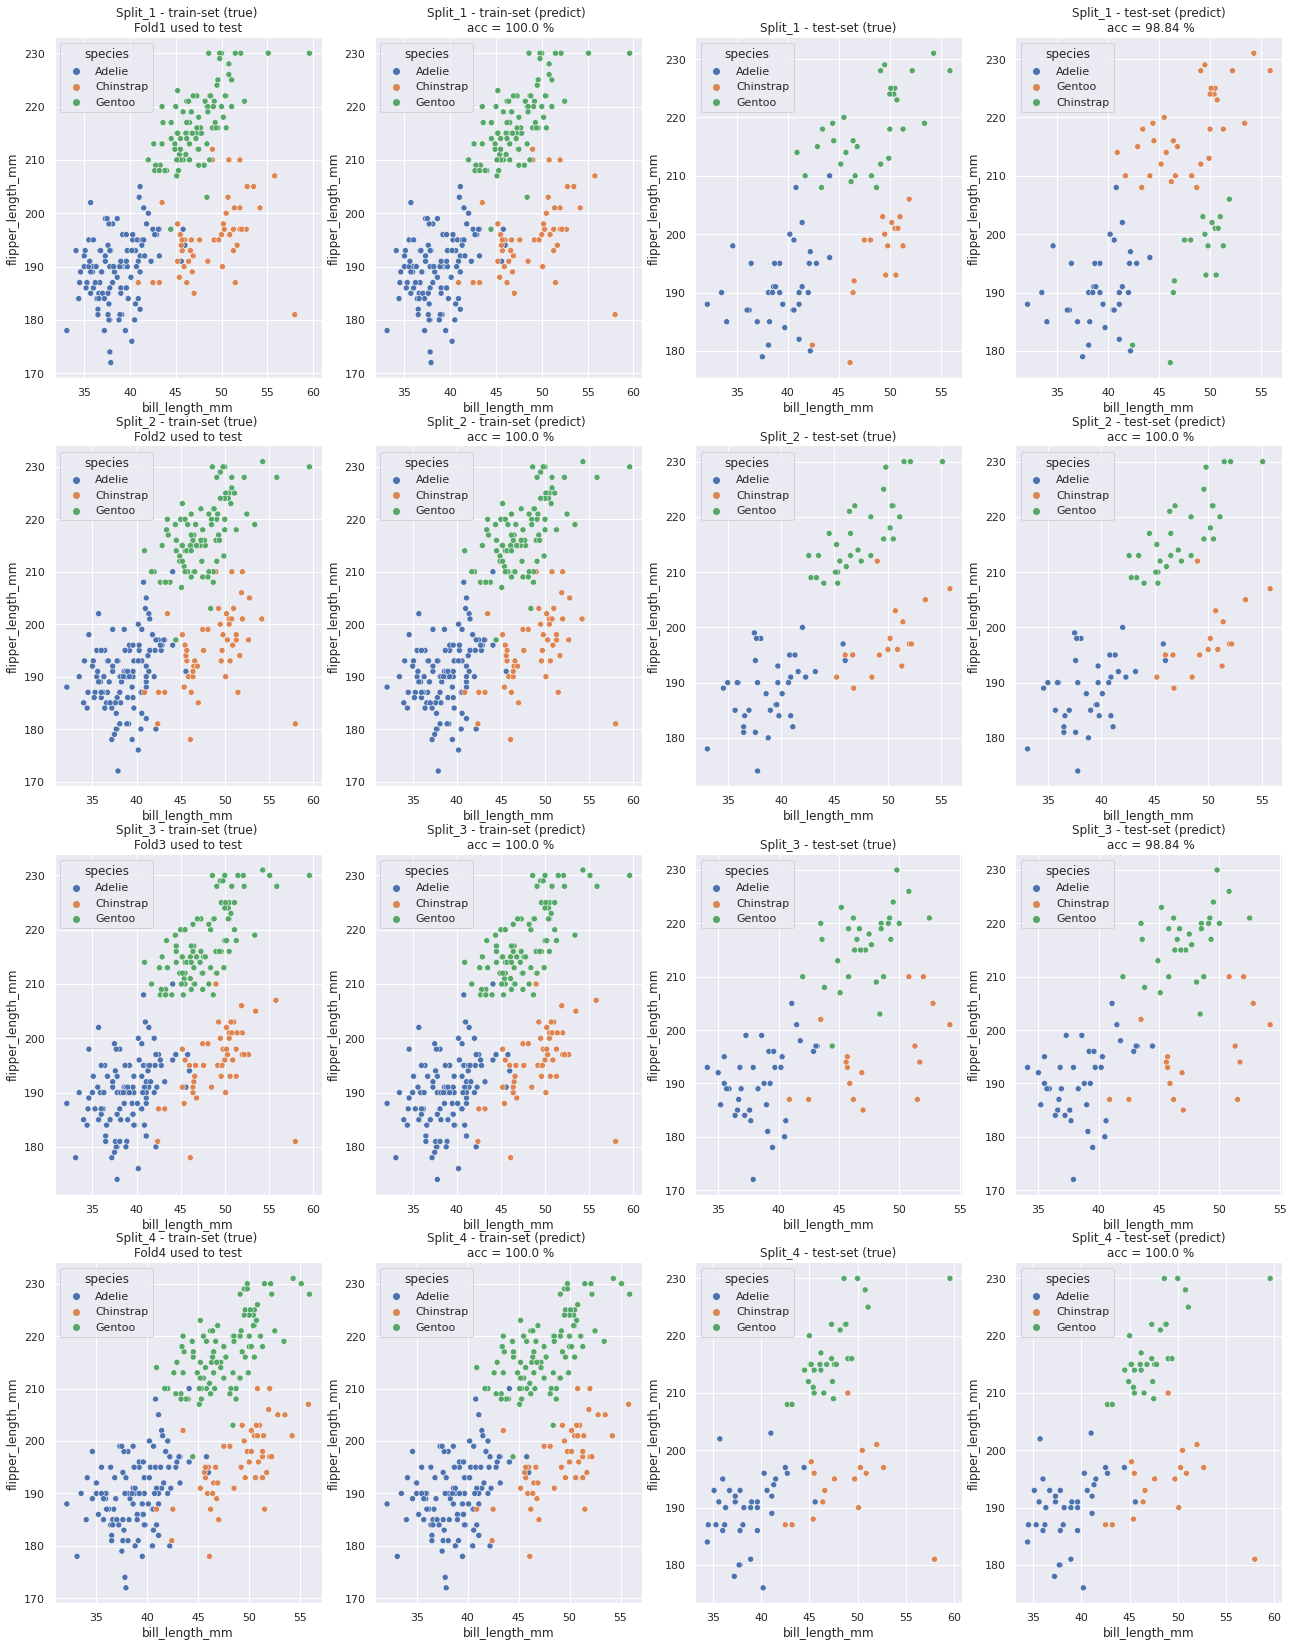

In [11]:
from sklearn.svm import SVC

clf = SVC(probability = True)
grid_params = {'kernel': ['linear', 'poly'],
               'degree': [2, 3, 5],
               'C': [5, 1, 1e-1, 5e-2],
               'gamma' : ['auto', 'scale']
             }
df2 = dvn_c.k_Fold_Best_params_show_all_(peng, n_folds, clf, grid_params, 
                                       clf_column, x_name, y_name, 
                                       show_all = True)
df2

#### Combine all the results from 2 above models / algorithms.

In [12]:
pd.concat([df.loc['avg_score_k_split'].rename("Random-Forest"),
           df1.loc['avg_score_k_split'].rename("Support-Vector-Machine")
          ], axis=1).T

ROC_AUC  accuracy  \
Random-Forest           0.999837  0.985465   
Support-Vector-Machine  0.999088  0.991279   

                                                                 f1_score  \
Random-Forest           {'Adelie': 0.985, 'Chinstrap': 0.9775, 'Gentoo...   
Support-Vector-Machine  {'Adelie': 0.99, 'Chinstrap': 0.985, 'Gentoo':...   

                                                                 precison  \
Random-Forest           {'Adelie': 0.9875, 'Chinstrap': 0.97, 'Gentoo'...   
Support-Vector-Machine  {'Adelie': 0.9875, 'Chinstrap': 0.985, 'Gentoo...   

                                                                   recall  \
Random-Forest           {'Adelie': 0.985, 'Chinstrap': 0.9775, 'Gentoo...   
Support-Vector-Machine  {'Adelie': 0.99, 'Chinstrap': 0.985, 'Gentoo':...   

                       log_loss(cross-entropy) n_features  \
Random-Forest                          0.06624          9   
Support-Vector-Machine                0.073896          9   

                                                               best_param  
Random-Forest           {'max_depth': 6, 'min_samples_split': 3, 'n_es...  
Support-Vector-Machine  {'max_depth': 6, 'min_samples_split': 3, 'n_es...

### In case your model has more than 20 input-features, PCA

In [13]:
url_link = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/241529ac005ff8b73f9a7520695739a95c27a2f3/US-Embassy_DS-course/Class%202/datasets/breast_cancer_data.csv"
df = pd.read_csv(url_link)
print("{}\nDataset property.\n{}".format(100*"=", 100*"="))
print(df.info())

Dataset property.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

In [14]:
col_to_drop = ["id"]
target_col = "diagnosis"
data = df
keep_ratio = 0.9999

pca_data = dvn_c.create_pca_dataset(data, col_to_drop, target_col, keep_ratio)
pca_data.head()

diagnosis         PC_1        PC_2       PC_3       PC_4       PC_5
0         M  1160.142574 -293.917544  48.578398  -8.711975  32.000486
1         M  1269.122443   15.630182 -35.394534  17.861283  -4.334874
2         M   995.793889   39.156743  -1.709753   4.199340  -0.466529
3         M  -407.180803  -67.380320   8.672848 -11.759867   7.115461
4         M   930.341180  189.340742   1.374801   8.499183   7.613289

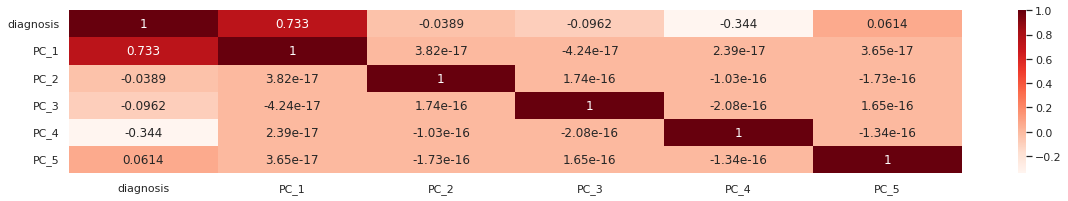

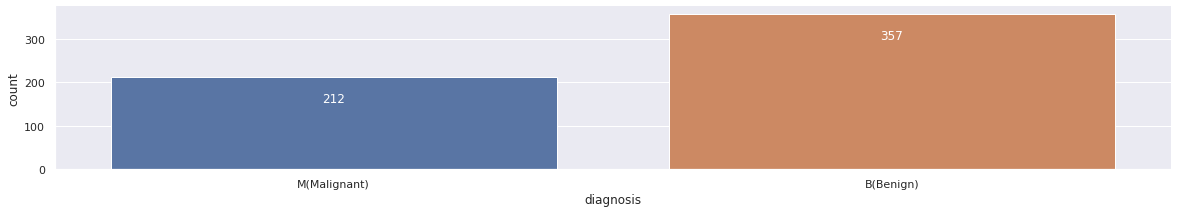

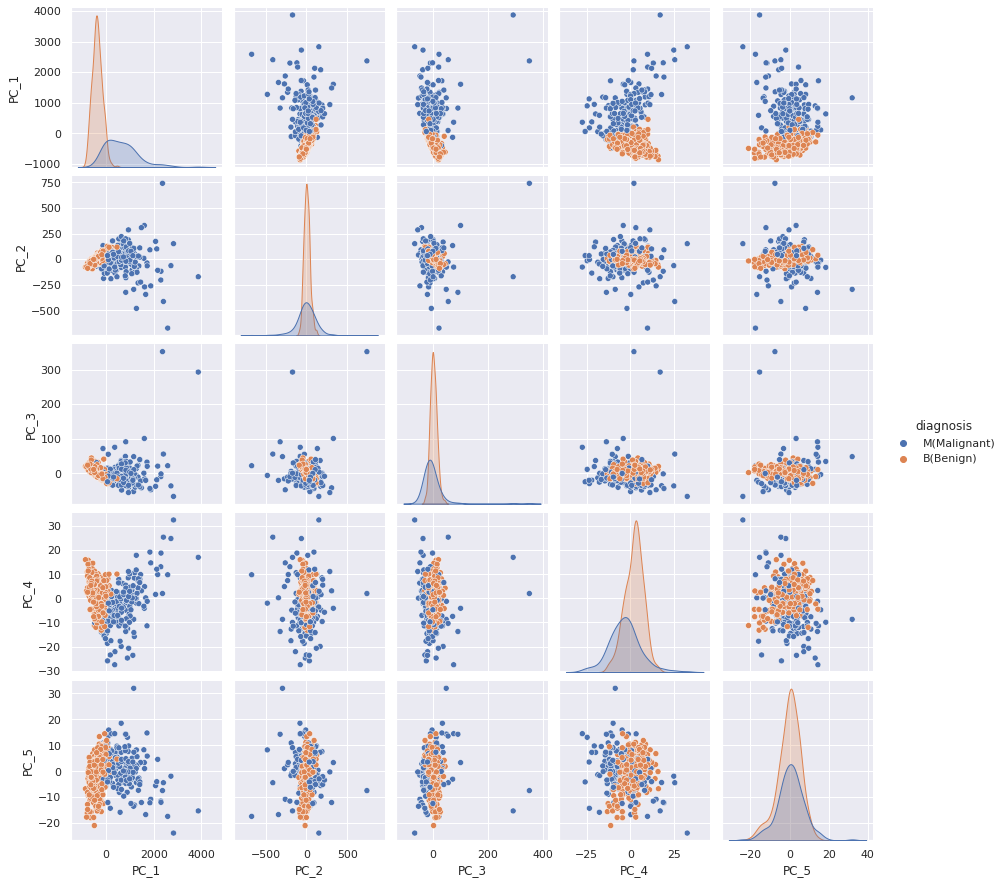

In [15]:
pca_data['diagnosis'] = pca_data['diagnosis'].replace({'M': 'M(Malignant)',
                                                      'B': 'B(Benign)'
                                                      })
preproc_data = dvn_c.classification_preprocessing(pca_data,
                                                  target_col = 'diagnosis')

Best parameters = {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 250} 
Trained_time = 0.0 minutes, 15.28 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.96      0.99      0.97        90
M(Malignant)       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.96      0.96      0.96        89
M(Malignant)       0.92      0.92      0.92        53

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142

Split_3. C

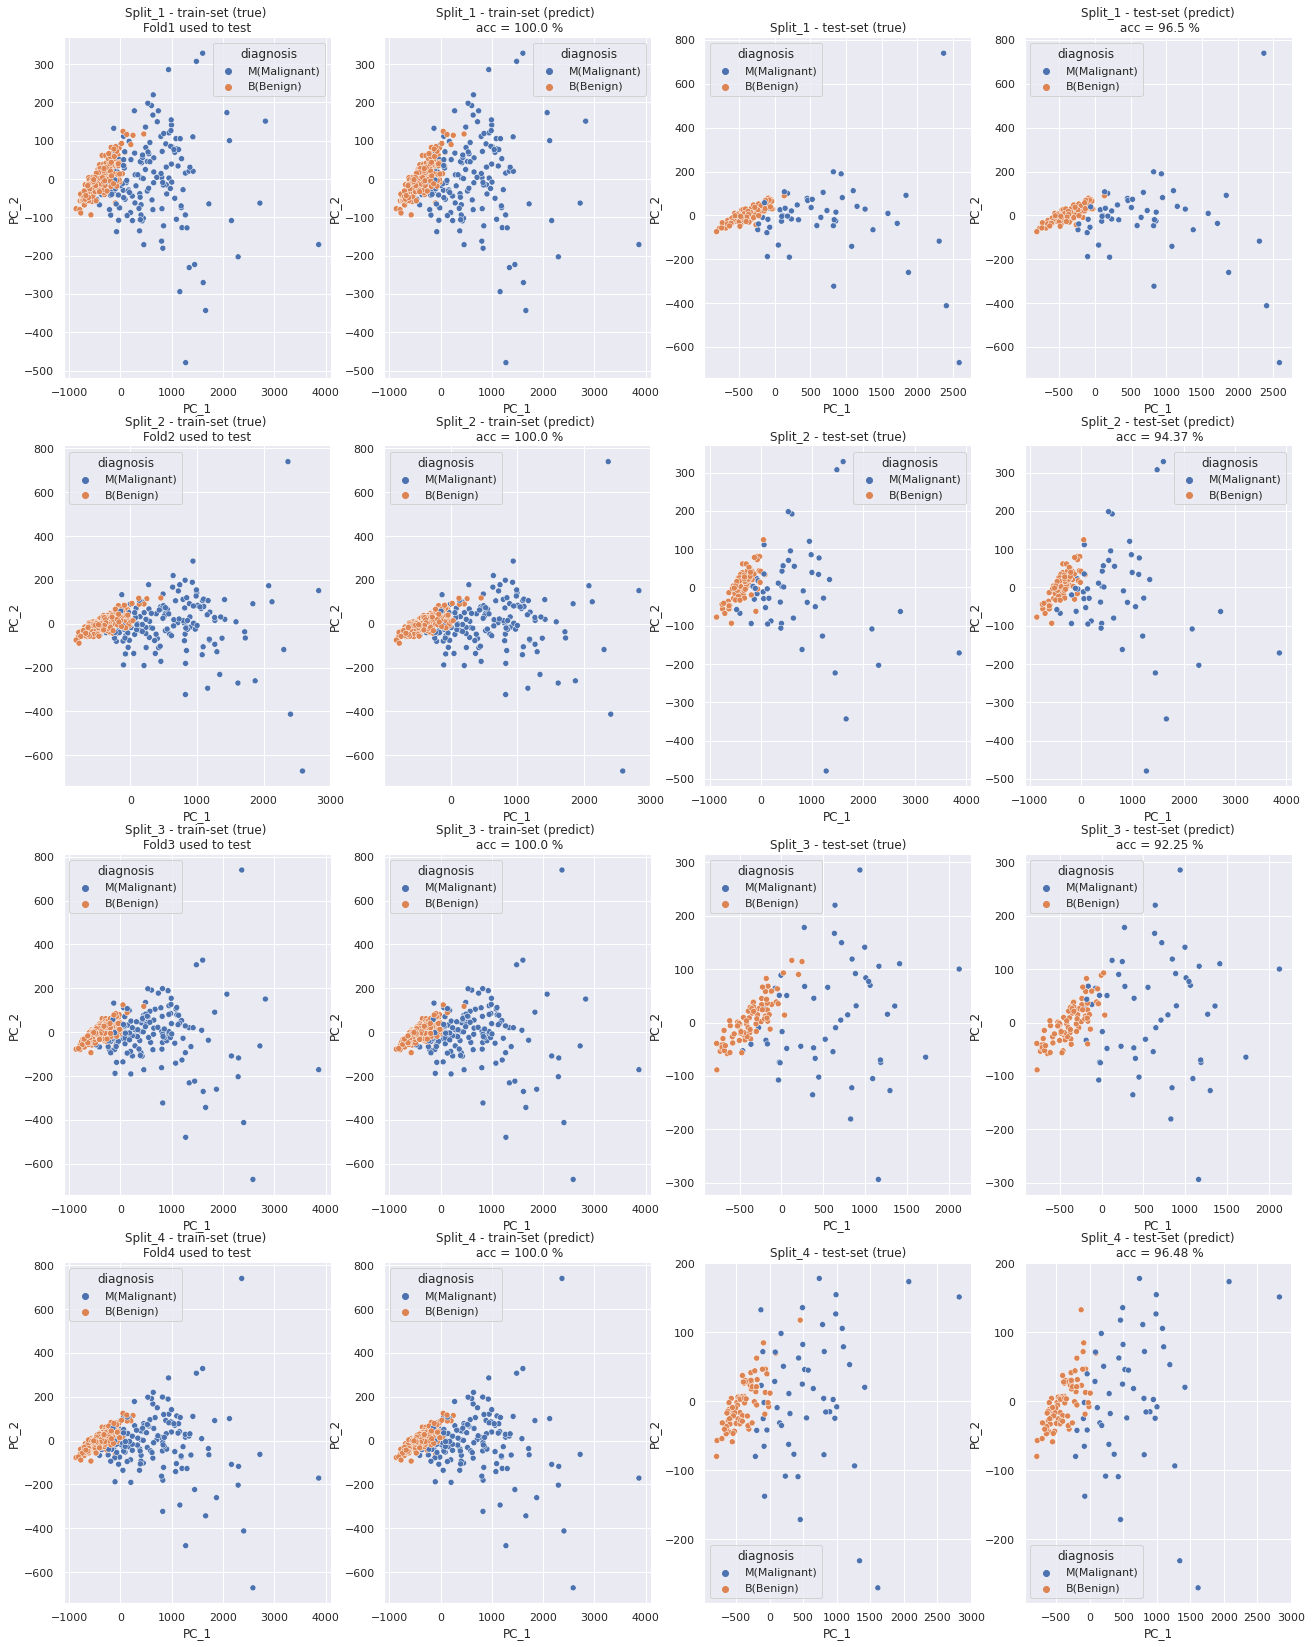

In [31]:
x_name, y_name = 'PC_1', 'PC_2'
clf = RandomForestClassifier()
grid_params = {'n_estimators': [100, 200, 250],
               'max_depth': [6, 8, 10],
               'min_samples_split': [1, 3]
             }
df1 = dvn_c.k_Fold_Best_params_show_all_(pca_data, n_folds, clf, grid_params, 
                                         'diagnosis', x_name, y_name, 
                                         show_all = True)

In [32]:
df1

ROC_AUC  accuracy  \
Split_1            0.982075  0.965035   
Split_2            0.991944  0.943662   
Split_3            0.967988  0.922535   
Split_4            0.995760  0.964789   
avg_score_k_split  0.984442  0.949005   

                                                    f1_score  \
Split_1            {'M(Malignant)': 0.97, 'B(Benign)': 0.95}   
Split_2            {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_3             {'M(Malignant)': 0.94, 'B(Benign)': 0.9}   
Split_4            {'M(Malignant)': 0.97, 'B(Benign)': 0.95}   
avg_score_k_split  {'M(Malignant)': 0.96, 'B(Benign)': 0.93}   

                                                        precison  \
Split_1                {'M(Malignant)': 0.96, 'B(Benign)': 0.98}   
Split_2                {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_3                {'M(Malignant)': 0.94, 'B(Benign)': 0.89}   
Split_4                {'M(Malignant)': 0.97, 'B(Benign)': 0.96}   
avg_score_k_split  {'M(Malignant)': 0.9575, 'B(Benign)': 0.9375}   

                                                      recall  \
Split_1            {'M(Malignant)': 0.99, 'B(Benign)': 0.92}   
Split_2            {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_3            {'M(Malignant)': 0.93, 'B(Benign)': 0.91}   
Split_4            {'M(Malignant)': 0.98, 'B(Benign)': 0.94}   
avg_score_k_split  {'M(Malignant)': 0.96, 'B(Benign)': 0.93}   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.333841           5   
Split_2                           0.126150           5   
Split_3                           0.222307           5   
Split_4                           0.106943           5   
avg_score_k_split                 0.197311           5   

                                                          best_param  
Split_1            {'max_depth': 10, 'min_samples_split': 3, 'n_e...  
Split_2            {'max_depth': 10, 'min_samples_split': 3, 'n_e...  
Split_3            {'max_depth': 10, 'min_samples_split': 3, 'n_e...  
Split_4            {'max_depth': 10, 'min_samples_split': 3, 'n_e...  
avg_score_k_split  {'max_depth': 10, 'min_samples_split': 3, 'n_e...

Best parameters = {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} 
Trained_time = 4.0 minutes, 23.17 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.96      0.99      0.97        90
M(Malignant)       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.95      0.97      0.96        89
M(Malignant)       0.94      0.91      0.92        53

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142

Split_3. Classification r

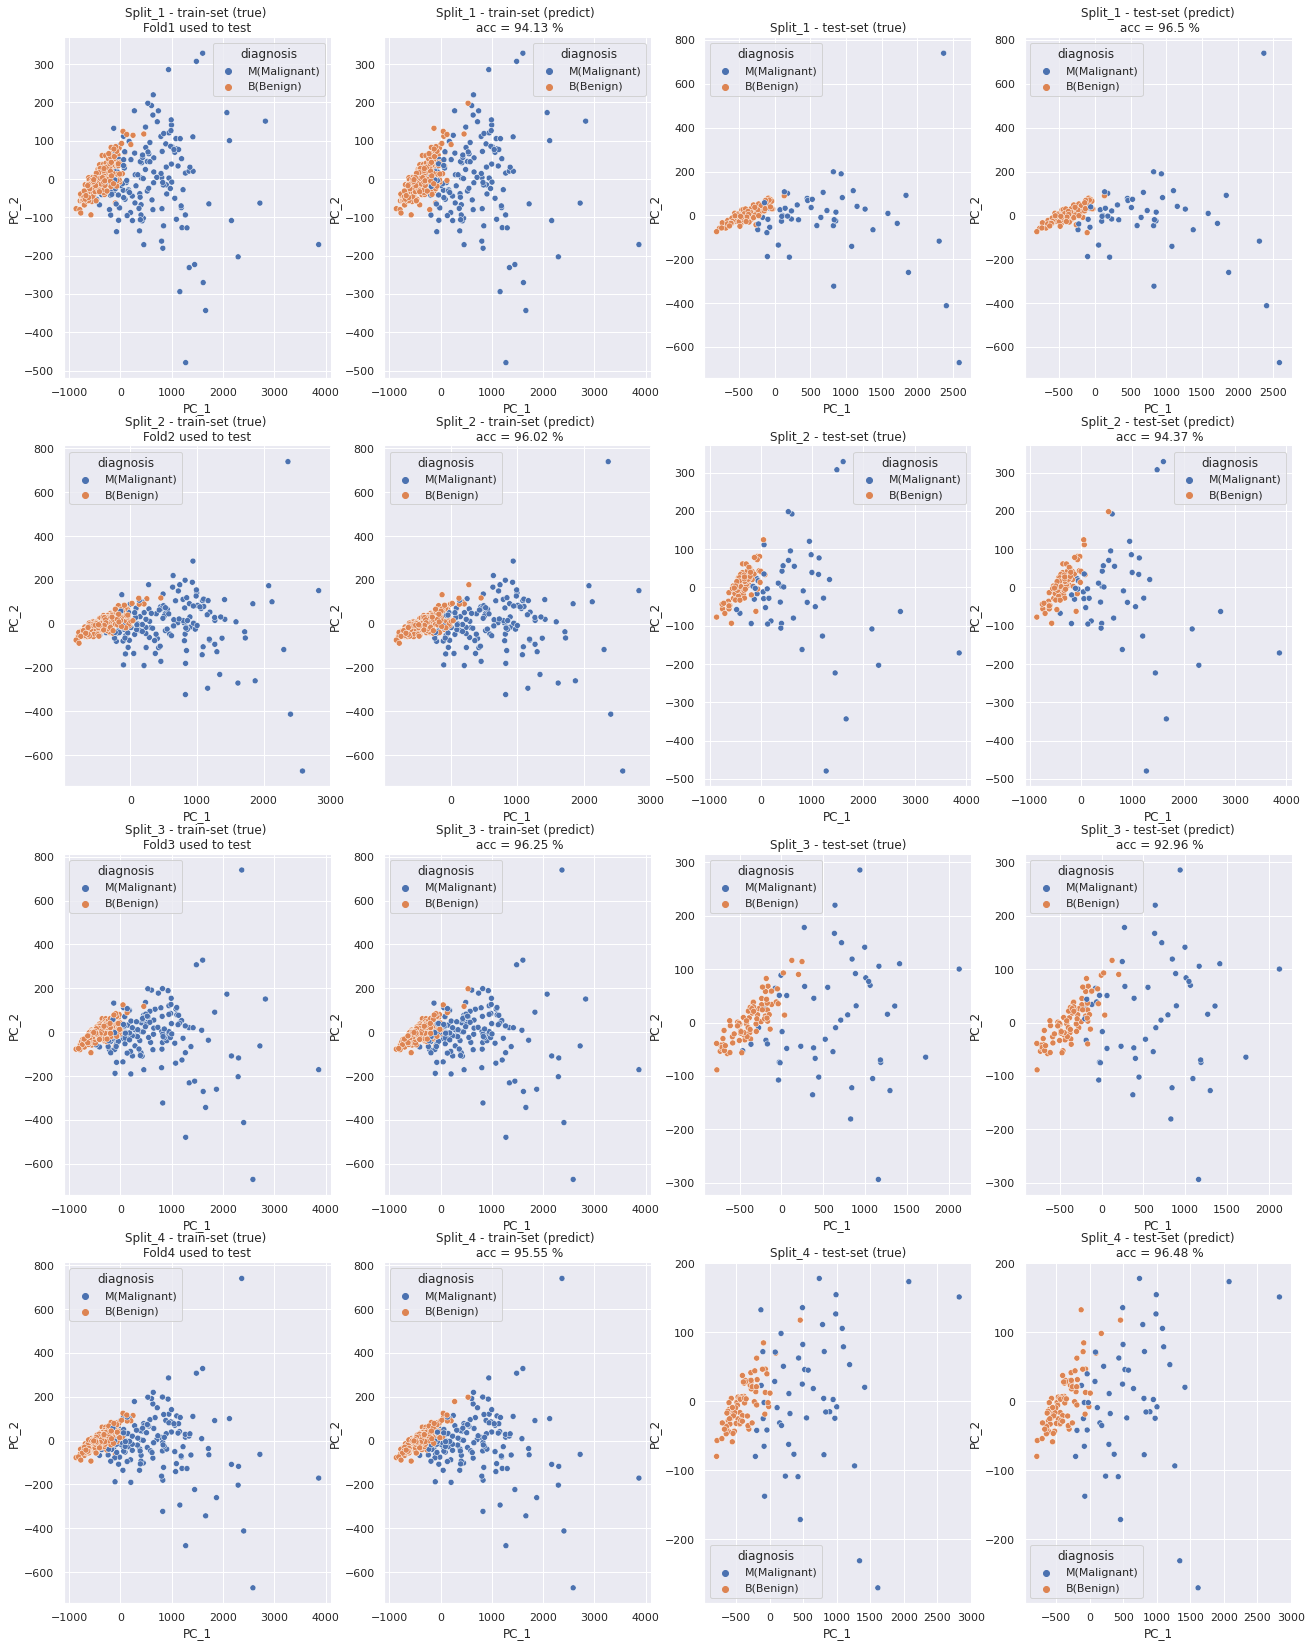

In [33]:
clf = SVC(probability = True)
grid_params = {'kernel': ['linear', 'rbf'],
               'C': [5, 1, 1e-1, 5e-2],
               'gamma' : ['auto', 'scale']
             }
df2 = dvn_c.k_Fold_Best_params_show_all_(pca_data, n_folds, clf, grid_params, 
                                         'diagnosis', x_name, y_name, 
                                         show_all = True)

In [34]:
df2

ROC_AUC  accuracy  \
Split_1            0.991195  0.965035   
Split_2            0.993216  0.943662   
Split_3            0.984100  0.929577   
Split_4            0.988340  0.964789   
avg_score_k_split  0.989213  0.950766   

                                                      f1_score  \
Split_1              {'M(Malignant)': 0.97, 'B(Benign)': 0.95}   
Split_2              {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_3              {'M(Malignant)': 0.94, 'B(Benign)': 0.91}   
Split_4              {'M(Malignant)': 0.97, 'B(Benign)': 0.95}   
avg_score_k_split  {'M(Malignant)': 0.96, 'B(Benign)': 0.9325}   

                                                       precison  \
Split_1               {'M(Malignant)': 0.96, 'B(Benign)': 0.98}   
Split_2               {'M(Malignant)': 0.95, 'B(Benign)': 0.94}   
Split_3               {'M(Malignant)': 0.94, 'B(Benign)': 0.91}   
Split_4               {'M(Malignant)': 0.97, 'B(Benign)': 0.96}   
avg_score_k_split  {'M(Malignant)': 0.955, 'B(Benign)': 0.9475}   

                                                        recall  \
Split_1              {'M(Malignant)': 0.99, 'B(Benign)': 0.92}   
Split_2              {'M(Malignant)': 0.97, 'B(Benign)': 0.91}   
Split_3              {'M(Malignant)': 0.94, 'B(Benign)': 0.91}   
Split_4              {'M(Malignant)': 0.98, 'B(Benign)': 0.94}   
avg_score_k_split  {'M(Malignant)': 0.96, 'B(Benign)': 0.9325}   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.119297           5   
Split_2                           0.120145           5   
Split_3                           0.150396           5   
Split_4                           0.122054           5   
avg_score_k_split                 0.127973           5   

                                                        best_param  
Split_1            {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
Split_2            {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
Split_3            {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
Split_4            {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
avg_score_k_split  {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}

Best parameters = {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 100} 
Trained_time = 0.0 minutes, 8.83 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.97      0.99      0.98        90
M(Malignant)       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.97      0.97      0.97        89
M(Malignant)       0.94      0.94      0.94        53

    accuracy                           0.96       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.96      0.96      0.96  

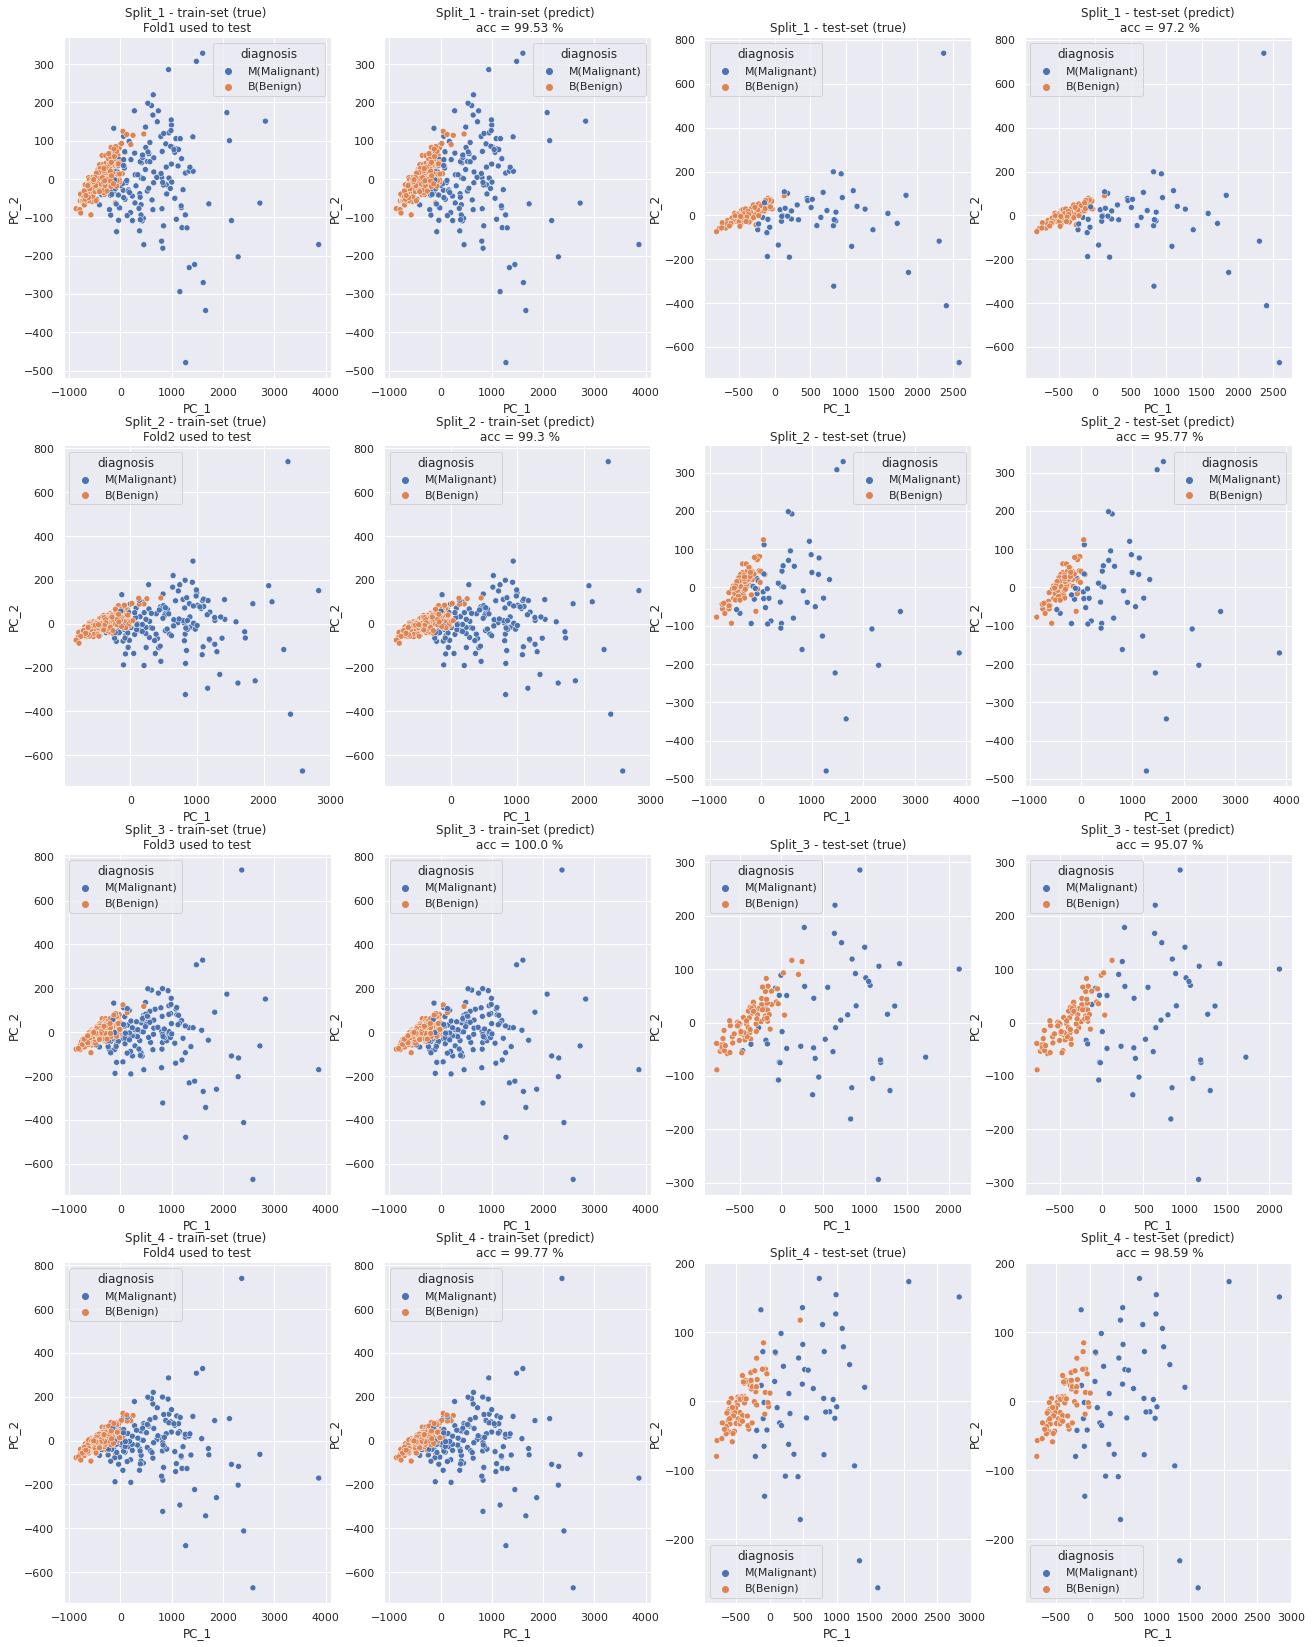

In [52]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

clf = ExtraTreesClassifier()

grid_params = {
              'n_estimators': [50, 100],
              'criterion' : ["gini", "entropy"],
              'max_depth': [8, 15],
              'min_samples_split' : [2,3,4]
             }
df3 = dvn_c.k_Fold_Best_params_show_all_(pca_data, n_folds, clf, grid_params, 
                                         'diagnosis', x_name, y_name, 
                                         show_all = True)

In [53]:
df3

ROC_AUC  accuracy  \
Split_1            0.994130  0.972028   
Split_2            0.994276  0.957746   
Split_3            0.981132  0.950704   
Split_4            0.996820  0.985915   
avg_score_k_split  0.991590  0.966599   

                                                       f1_score  \
Split_1               {'M(Malignant)': 0.98, 'B(Benign)': 0.96}   
Split_2               {'M(Malignant)': 0.97, 'B(Benign)': 0.94}   
Split_3               {'M(Malignant)': 0.96, 'B(Benign)': 0.93}   
Split_4               {'M(Malignant)': 0.99, 'B(Benign)': 0.98}   
avg_score_k_split  {'M(Malignant)': 0.975, 'B(Benign)': 0.9525}   

                                                      precison  \
Split_1              {'M(Malignant)': 0.97, 'B(Benign)': 0.98}   
Split_2              {'M(Malignant)': 0.97, 'B(Benign)': 0.94}   
Split_3              {'M(Malignant)': 0.96, 'B(Benign)': 0.94}   
Split_4              {'M(Malignant)': 0.99, 'B(Benign)': 0.98}   
avg_score_k_split  {'M(Malignant)': 0.9725, 'B(Benign)': 0.96}   

                                                         recall  \
Split_1               {'M(Malignant)': 0.99, 'B(Benign)': 0.94}   
Split_2               {'M(Malignant)': 0.97, 'B(Benign)': 0.94}   
Split_3               {'M(Malignant)': 0.97, 'B(Benign)': 0.92}   
Split_4               {'M(Malignant)': 0.99, 'B(Benign)': 0.98}   
avg_score_k_split  {'M(Malignant)': 0.975, 'B(Benign)': 0.9525}   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.135461           5   
Split_2                           0.131741           5   
Split_3                           0.172179           5   
Split_4                           0.127444           5   
avg_score_k_split                 0.141706           5   

                                                          best_param  
Split_1            {'criterion': 'gini', 'max_depth': 15, 'min_sa...  
Split_2            {'criterion': 'gini', 'max_depth': 15, 'min_sa...  
Split_3            {'criterion': 'gini', 'max_depth': 15, 'min_sa...  
Split_4            {'criterion': 'gini', 'max_depth': 15, 'min_sa...  
avg_score_k_split  {'criterion': 'gini', 'max_depth': 15, 'min_sa...

Best parameters = {'learning_rate': 1, 'max_depth': 8, 'n_estimators': 100} 
Trained_time = 0.0 minutes, 16.74 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.96      0.96      0.96        90
M(Malignant)       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.95      0.94      0.95        89
M(Malignant)       0.91      0.92      0.92        53

    accuracy                           0.94       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.94      0.94      0.94       142

Split_3. Classi

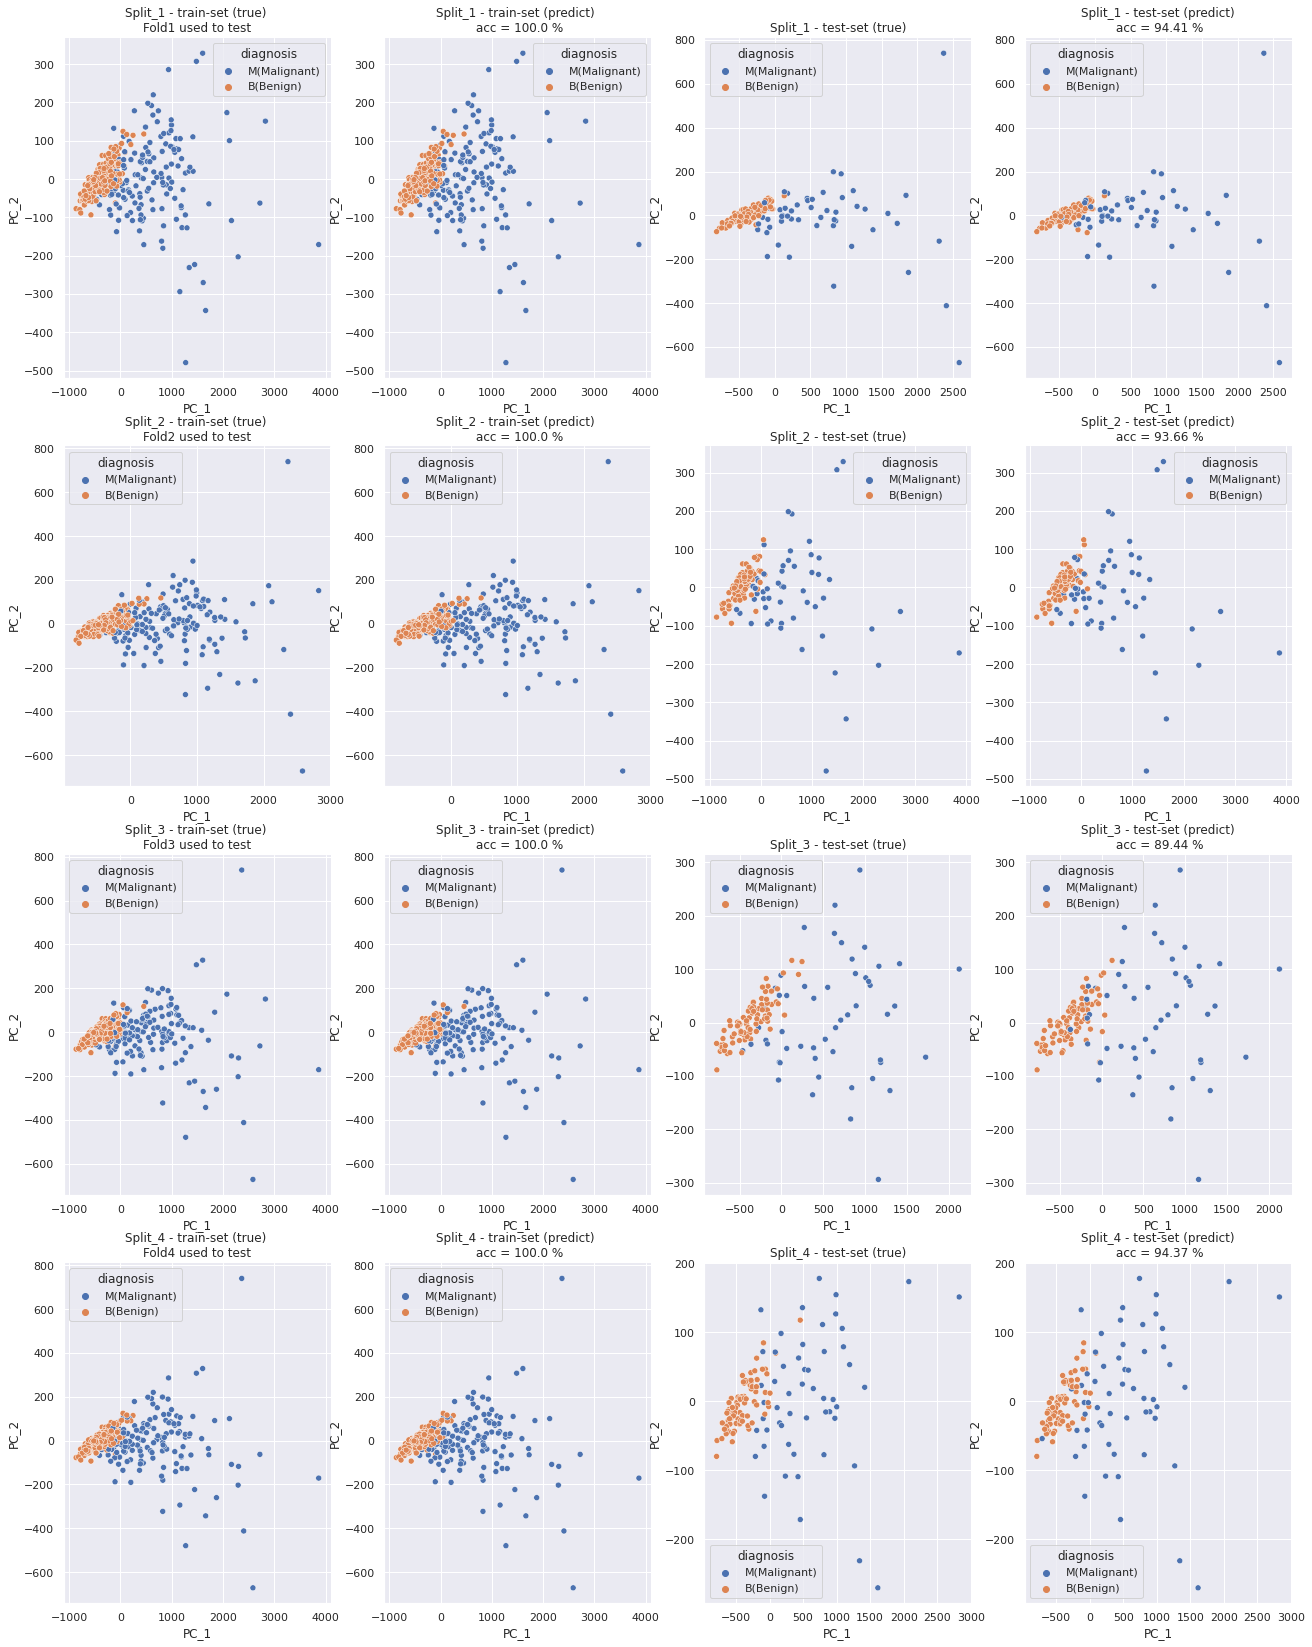

In [54]:
clf = GradientBoostingClassifier()
grid_params = {
              'n_estimators': [100, 150, 200],
              'learning_rate' : [1e-3, 1, 1e-1],
              'max_depth': [8, 15]
             }
df4 = dvn_c.k_Fold_Best_params_show_all_(pca_data, n_folds, clf, grid_params, 
                                         'diagnosis', x_name, y_name, 
                                         show_all = True)

In [55]:
df4

ROC_AUC  accuracy  \
Split_1            0.956918  0.944056   
Split_2            0.983146  0.936620   
Split_3            0.948484  0.894366   
Split_4            0.969790  0.943662   
avg_score_k_split  0.964585  0.929676   

                                                       f1_score  \
Split_1               {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_2               {'M(Malignant)': 0.95, 'B(Benign)': 0.92}   
Split_3               {'M(Malignant)': 0.92, 'B(Benign)': 0.86}   
Split_4               {'M(Malignant)': 0.95, 'B(Benign)': 0.93}   
avg_score_k_split  {'M(Malignant)': 0.945, 'B(Benign)': 0.9075}   

                                                      precison  \
Split_1              {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_2              {'M(Malignant)': 0.95, 'B(Benign)': 0.91}   
Split_3              {'M(Malignant)': 0.91, 'B(Benign)': 0.87}   
Split_4              {'M(Malignant)': 0.98, 'B(Benign)': 0.89}   
avg_score_k_split  {'M(Malignant)': 0.95, 'B(Benign)': 0.8975}   

                                                         recall  \
Split_1               {'M(Malignant)': 0.96, 'B(Benign)': 0.92}   
Split_2               {'M(Malignant)': 0.94, 'B(Benign)': 0.92}   
Split_3               {'M(Malignant)': 0.92, 'B(Benign)': 0.85}   
Split_4               {'M(Malignant)': 0.93, 'B(Benign)': 0.96}   
avg_score_k_split  {'M(Malignant)': 0.945, 'B(Benign)': 0.9075}   

                   log_loss(cross-entropy)  n_features  \
Split_1                           0.923733           5   
Split_2                           0.941949           5   
Split_3                           1.802665           5   
Split_4                           0.631522           5   
avg_score_k_split                 1.074967           5   

                                                          best_param  
Split_1            {'learning_rate': 1, 'max_depth': 8, 'n_estima...  
Split_2            {'learning_rate': 1, 'max_depth': 8, 'n_estima...  
Split_3            {'learning_rate': 1, 'max_depth': 8, 'n_estima...  
Split_4            {'learning_rate': 1, 'max_depth': 8, 'n_estima...  
avg_score_k_split  {'learning_rate': 1, 'max_depth': 8, 'n_estima...

Best parameters = {'learning_rate': 0.1, 'n_estimators': 200} 
Trained_time = 0.0 minutes, 14.86 seconds 
----------------------------------------------------------------------------------------------------
Split_1. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.95      0.98      0.96        90
M(Malignant)       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Split_2. Classification report (on the test-set only).
              precision    recall  f1-score   support

   B(Benign)       0.92      0.98      0.95        89
M(Malignant)       0.96      0.85      0.90        53

    accuracy                           0.93       142
   macro avg       0.94      0.91      0.92       142
weighted avg       0.93      0.93      0.93       142

Split_3. Classification repor

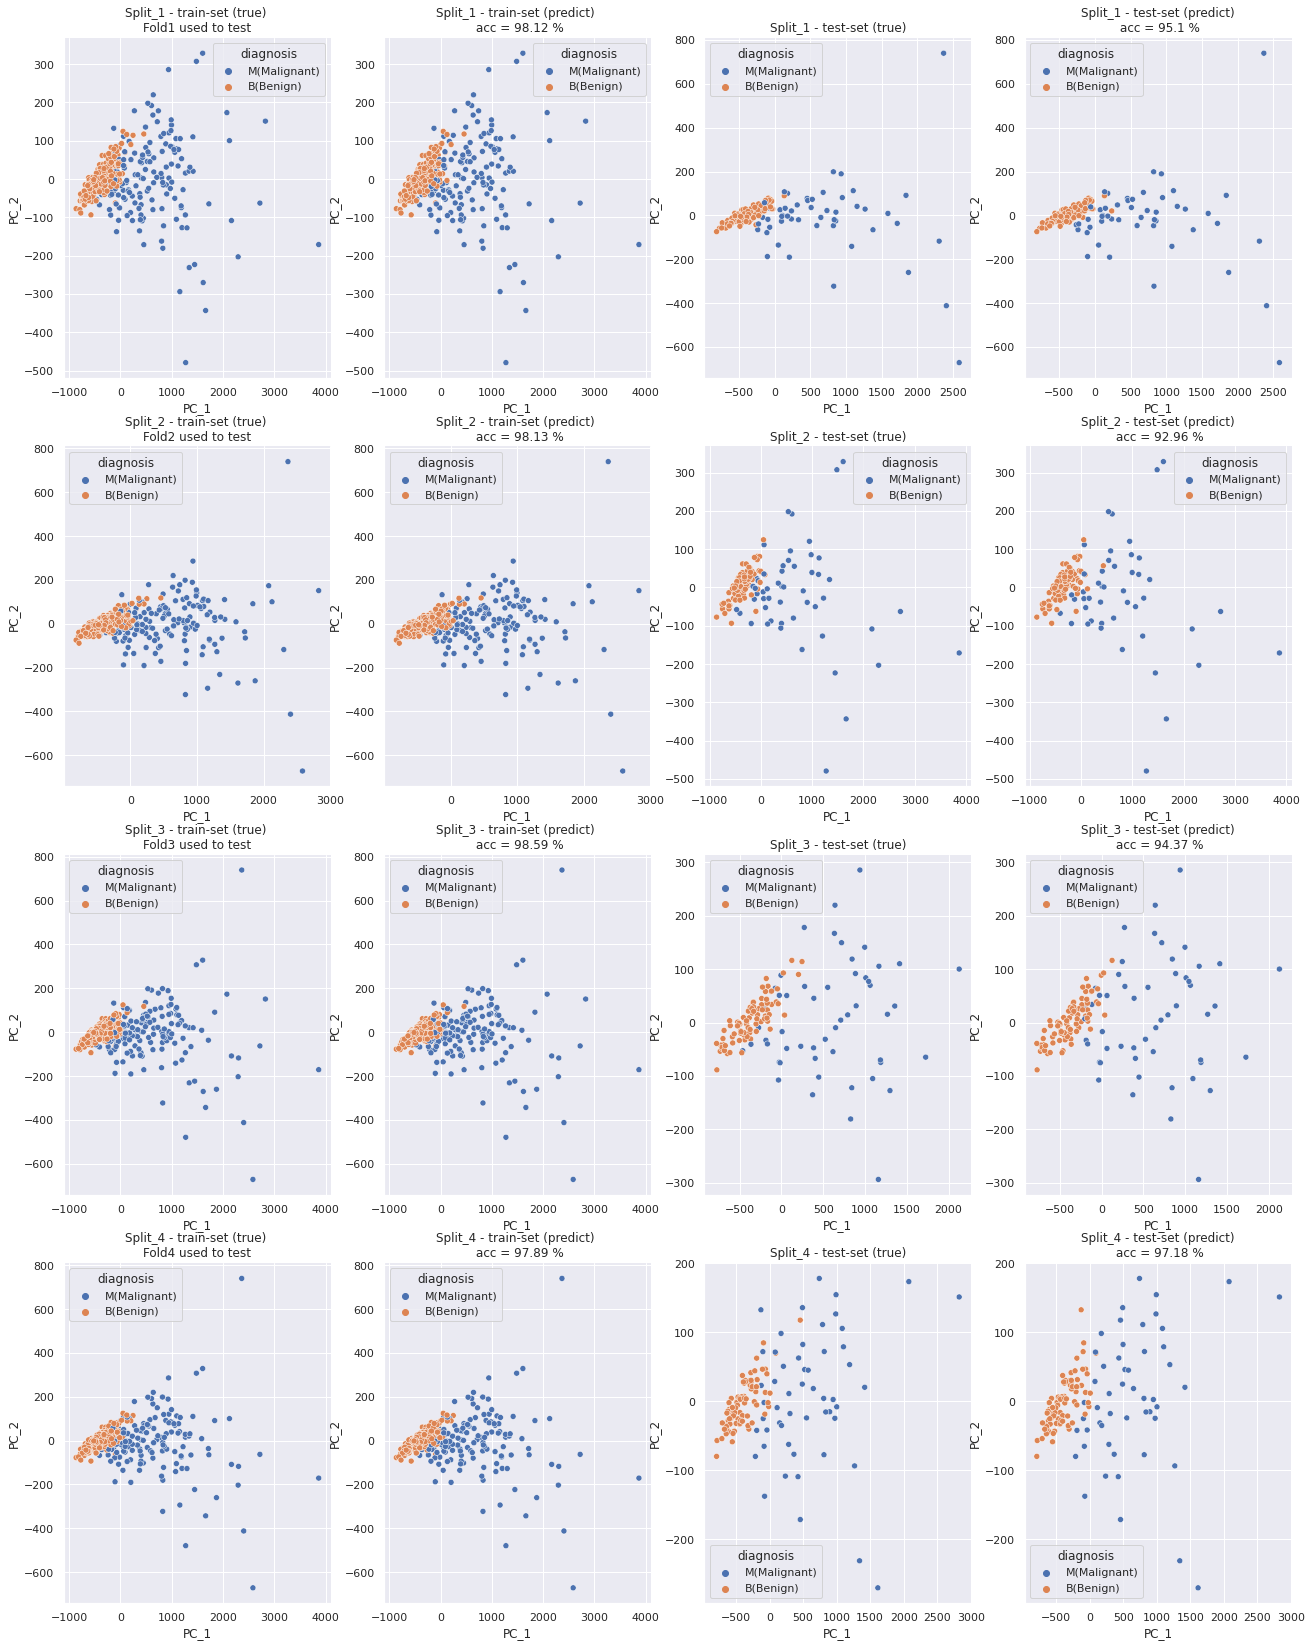

In [59]:
clf = AdaBoostClassifier()
grid_params = {
              'n_estimators': [100, 150, 200],
              'learning_rate' : [1e-2,1, 1e-1,1e-3]
             }
df5 = dvn_c.k_Fold_Best_params_show_all_(pca_data, n_folds, clf, grid_params, 
                                         'diagnosis', x_name, y_name, 
                                         show_all = True)

In [62]:
pd.concat([
           df1.loc['avg_score_k_split'].rename("Random-Forest"),
           df2.loc['avg_score_k_split'].rename("Support-Vector-Machine"),
           df3.loc['avg_score_k_split'].rename("Extra-Tree"),
           df4.loc['avg_score_k_split'].rename("Gradient-Boosting"),
           df5.loc['avg_score_k_split'].rename("AdaBoost")
          ], 
            axis = 1
        ).T.sort_values(by = 'ROC_AUC', ascending = False)

ROC_AUC  accuracy  \
Extra-Tree               0.99159  0.966599   
AdaBoost                0.989432   0.94903   
Support-Vector-Machine  0.989213  0.950766   
Random-Forest           0.984442  0.949005   
Gradient-Boosting       0.964585  0.929676   

                                                             f1_score  \
Extra-Tree               {'M(Malignant)': 0.975, 'B(Benign)': 0.9525}   
AdaBoost                {'M(Malignant)': 0.9625, 'B(Benign)': 0.9275}   
Support-Vector-Machine    {'M(Malignant)': 0.96, 'B(Benign)': 0.9325}   
Random-Forest               {'M(Malignant)': 0.96, 'B(Benign)': 0.93}   
Gradient-Boosting        {'M(Malignant)': 0.945, 'B(Benign)': 0.9075}   

                                                             precison  \
Extra-Tree                {'M(Malignant)': 0.9725, 'B(Benign)': 0.96}   
AdaBoost                   {'M(Malignant)': 0.95, 'B(Benign)': 0.955}   
Support-Vector-Machine   {'M(Malignant)': 0.955, 'B(Benign)': 0.9475}   
Random-Forest           {'M(Malignant)': 0.9575, 'B(Benign)': 0.9375}   
Gradient-Boosting         {'M(Malignant)': 0.95, 'B(Benign)': 0.8975}   

                                                               recall  \
Extra-Tree               {'M(Malignant)': 0.975, 'B(Benign)': 0.9525}   
AdaBoost                {'M(Malignant)': 0.9625, 'B(Benign)': 0.9275}   
Support-Vector-Machine    {'M(Malignant)': 0.96, 'B(Benign)': 0.9325}   
Random-Forest               {'M(Malignant)': 0.96, 'B(Benign)': 0.93}   
Gradient-Boosting        {'M(Malignant)': 0.945, 'B(Benign)': 0.9075}   

                       log_loss(cross-entropy) n_features  \
Extra-Tree                            0.141706          5   
AdaBoost                              0.503656          5   
Support-Vector-Machine                0.127973          5   
Random-Forest                         0.197311          5   
Gradient-Boosting                     1.074967          5   

                                                               best_param  
Extra-Tree              {'criterion': 'gini', 'max_depth': 15, 'min_sa...  
AdaBoost                      {'learning_rate': 0.1, 'n_estimators': 200}  
Support-Vector-Machine    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
Random-Forest           {'max_depth': 10, 'min_samples_split': 3, 'n_e...  
Gradient-Boosting       {'learning_rate': 1, 'max_depth': 8, 'n_estima...

In [63]:
import skimage